## Import libraries and customize matplotlib styles params

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
   from google.colab import output
   output.enable_custom_widget_manager()
   !pip install --quiet ipympl

%matplotlib widget
plt.ioff()

plt.rcParams.update(plt.rcParamsDefault)
px2inch = 1/plt.rcParams['figure.dpi']

SMALL_SIZE  = 8
MEDIUM_SIZE = 10

# title
plt.rc('axes',titlesize=MEDIUM_SIZE,titleweight='bold')
# xy-labells
plt.rc('axes',labelsize=MEDIUM_SIZE)
# xy-ticks
plt.rc('xtick',labelsize=SMALL_SIZE)
plt.rc('ytick',labelsize=SMALL_SIZE)
plt.rc('legend',fontsize=SMALL_SIZE, loc='lower right', framealpha=0.99) 

def plot_sets(ax,gr=False,ti='',xla=False,yla=False,zla=False,xli=False,yli=False,zli=False,ticks_off=False,xticks_off=False,yticks_off=False,zticks_off=False, ba=False, ar=False,leg=False,view=False):
    
    ax.grid(gr)
    ax.set_title(ti)
    if xla: ax.set_xlabel(xla)
    if yla: ax.set_ylabel(yla)
    if zla: ax.set_zlabel(zla)

    if xticks_off: ax.set_xticklabels([])
    if yticks_off: ax.set_yticklabels([])
    if zticks_off: ax.set_zticklabels([])

    if   ticks_off==1: ax.set_xticklabels([]); ax.set_xticks([]);ax.set_yticklabels([]); ax.set_yticks([])
    elif ticks_off==2: ax.set_xticklabels([]); ax.set_xticks([])
    elif ticks_off==2: ax.set_yticklabels([]); ax.set_yticks([])

    if ba: ax.set_box_aspect(ba)
    if ar: ax.set_aspect(ar)

    if xli: ax.set_xlim(xli)
    if yli: ax.set_ylim(yli)
    if zli: ax.set_zlim(zli)

    if leg: ax.legend(**leg)

    if view:ax.view_init(**view)
   


## Main functions

In [2]:

def trunc(values, decs=0):
    return np.trunc(values*10**decs)/(10**decs)

def logistic_map(x0=0.5,r=3.5,N=2000,Nunique=200,Ndecimals=6):
    ''' Xn=f(x0,r)'''
    X    = np.zeros(N)
    X[0] = x0
    for i in range(N-1):
        X[i+1] = r*X[i]*(1-X[i])
    Xunq = np.unique( trunc(X[-Nunique:], decs=Ndecimals))
    return X,Xunq

def get_C( C_lims= [0,1] ):
    fi   = np.random.rand()*2*np.pi
    M    = (C_lims[1]-C_lims[0]) * np.random.rand()  + C_lims[0]
    return M*( np.cos(fi) + 1j*np.sin(fi) )

def distance_points(x,y):
    xy        = np.hstack([x.reshape(-1,1),y.reshape(-1,1)])
    distances = np.sqrt( np.sum(np.diff(xy,axis=0)**2,axis=1) )
    return distances

def mandelbrot_orbits(N,C):

    Z    = np.full(N, np.nan, dtype=np.complex_)
    Z[0] = 0

    for i in range(N-1):
        Z[i+1] = Z[i]**2 + C
        if np.abs(Z[i])>=2:
           break
    return np.real(Z), np.imag(Z), i
 
def mandelbrot_set(Nmax=200,Msize=500,lims={ "xlims":[-1.9,0.7],"ylims":[-1.2,1.2]}):
    
    dx = np.diff(lims["xlims"])[0]
    dy = np.diff(lims["ylims"])[0]
    if   dx>dy: Nx,Ny = round(dx/dy * Msize),round(Msize)
    elif dy>dx: Ny,Nx = round(dy/dx * Msize),round(Msize)
    else:       Ny,Nx = round(Msize),round(Msize)
    
    x       = np.linspace(lims["xlims"][0],lims["xlims"][1],Nx) # Ncols
    y       = np.linspace(lims["ylims"][0],lims["ylims"][1],Ny) # Nrows
    CRe,CIm = np.meshgrid(x,y)
    C     = CRe + CIm*1j
    Ma    = []

    def iterations(Nmax,C):
        Z = 0
        for k in range(Nmax):
            Z = Z**2 + C
            if np.abs(Z)>=2: break
        return k

    for c in C.flatten():
            Ma.append( iterations(Nmax,c) )

    return CRe,CIm, np.reshape(Ma,C.shape)

def map_fun(a,b,n=10,mode='log',Npoints=100,decrease_diff=False):
    """ xn[0,1] --> xm[a,b]
        decrease_diff     not decrease_diff  
        ################################   
        1-(x-1)**2  even  |   x**2,x**3
        1+(x-1)**3  odd   |                 
                          |
        log10(9*x+1)      |  (10**x-1)/9      """
        
    
    xn= np.linspace(0,1,Npoints)
    
    if mode == 'log':
       if decrease_diff: xs=np.emath.logn(n, (n-1)*xn+1)   
       else:             xs=(n**(xn)-1)/(n-1)  
    if mode == 'exp':
        if decrease_diff:  xs = 1 -(-1)**n*(xn-1)**n
        else:              xs = xn**n

    xm = (b-a)*xs + a

    return xm,xn 

def mandelbrot_set3D(Nmax=500,Msize=100,xscaled=False,lims={ "xlims":[-1.9,0.7],"ylims":[-1.2,1.2]}):
    
    dx = np.diff(lims["xlims"])[0]
    dy = np.diff(lims["ylims"])[0]
    if   dx>dy: Nx,Ny = round(dx/dy * Msize),round(Msize)
    elif dy>dx: Ny,Nx = round(dy/dx * Msize),round(Msize)
    else:       Ny,Nx = round(Msize),round(Msize)
    
    if xscaled:
        a = lims["xlims"][0]
        b = lims["xlims"][1]
        x,_ = map_fun(a,b,n=xscaled,mode='log',Npoints=Nx,decrease_diff=False)
    else:
        x = np.linspace(lims["xlims"][0],lims["xlims"][1],Nx) # Ncols
 
    y       = np.linspace(lims["ylims"][0],lims["ylims"][1],Ny) # Nrows
    CRe,CIm = np.meshgrid(x,y)
    C       = CRe + CIm*1j

    def trunc(values, decs=4):
        return np.trunc(values*10**decs)/(10**decs)

    def iterations(Nmax,C):
        
        Z    = np.zeros(Nmax, dtype=np.complex_)
        Z[0] = 0
        for i in range(Nmax-1):
            Z[i+1] = Z[i]**2 + C
            if np.abs(Z[i])>=2:
               break
        if i==Nmax-2: return {'IN_Mandelbrot_set':True, 'data':Z     }
        else:         return {'IN_Mandelbrot_set':False,'data':np.nan}

    Nunq    = 10
    periods = np.array([])
    Cre     = np.array([])   
    Cim     = np.array([]) 
    Zre     = np.array([])

    for c in C.flatten():
            
            orbit = iterations(Nmax,c)

            if orbit['IN_Mandelbrot_set']:
               Z       = orbit['data']
               zre     = np.real(Z[-Nunq:])
               zre     = np.unique( trunc(zre, decs=6) )
               Zre     = np.concatenate( (Zre,zre) )
               nper    = zre.size
               Cre     = np.concatenate( (Cre, np.real(c)*np.ones(nper)) )
               Cim     = np.concatenate( (Cim, np.imag(c)*np.ones(nper)) )
               periods = np.concatenate( (periods, nper*np.ones(nper)  ) )

    return Cre,Cim,Zre,periods

# When you love wavelets and make this python animation for undersatandinc the topic...
# Wavelets are fundamental tool 

## Mandelbrot Orbits

C0: -0.95206066 0.19693680*1j
C1: -0.40729097 0.58204151*1j
C2: -0.59369838 -0.40806276*1j
C3: -0.76666276 0.04867962*1j
C4: -0.02510049 -0.73653387*1j


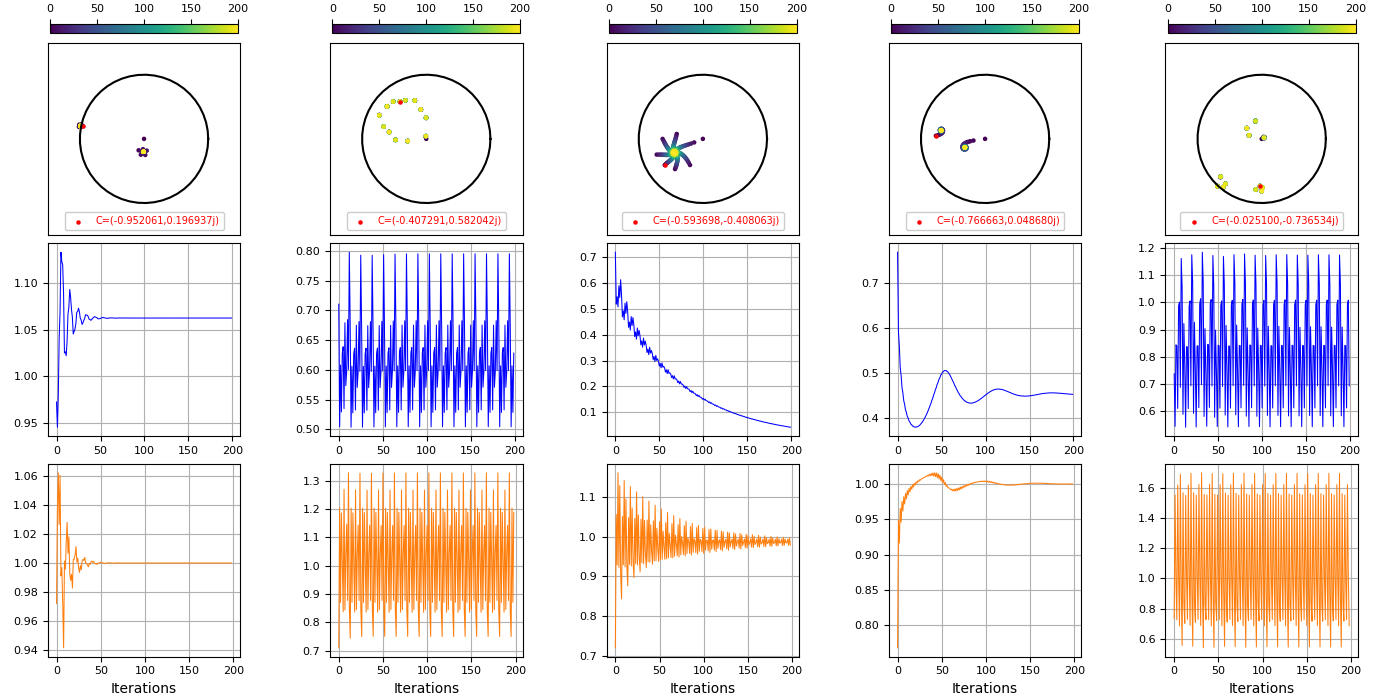

In [3]:

ncols   = 5
nrows   = 3
Nplots  = [nrows,ncols]
fig, ax = plt.subplots(Nplots[0],Nplots[1],figsize=(1400*px2inch ,700*px2inch),constrained_layout=True)
fig.canvas.header_visible = False
ax      = ax.flatten()
axlim   = [-1.5,1.5]
MS      = 5

theta = np.linspace(0,2*np.pi)
xc,yc  = np.cos(theta),np.sin(theta)
N      = 201
C_lims = [0.4,1.4]

for i in range(ncols):
    
    while True:
          C              = get_C(C_lims)
          zx,zy,iter     = mandelbrot_orbits(N,C)
          distance_P1_P2 = distance_points(zx,zy)
          mean_dis       = np.mean(distance_P1_P2[-int(N/2):])
          estable        = N-2
          no_estable     = int(N/2)
          
          if iter>no_estable  and mean_dis>0.05:
             Cx,Cy = np.real(C),np.imag(C)
             ratio = distance_P1_P2[1:]/distance_P1_P2[:-1]
             print(f'C{i}: {Cx:0.8f} {Cy:0.8f}*1j')
             break

    # Row 1
    #######    
    # Unit Circle
    ax[i].plot(xc,yc,'k')
    
    # Iterations
    points = ax[i].scatter(zx, zy, s=MS, c=np.arange(N))
    fig.colorbar(points, ax=ax[i],location='top', shrink=0.7)

    # C point
    ax[i].scatter(Cx,Cy,s=MS,c='r',label=f'C=({Cx:0.6f},{Cy:0.6f}j)')
    plot_sets(ax[i],xli=axlim,yli=axlim,ba=1,ar=1,ticks_off=1,leg={'labelcolor':'linecolor','loc':'lower center','fontsize':7})
    
    # Row 2
    #######  
    ax[ncols+i].plot( distance_P1_P2  ,'b',lw=0.75)
    plot_sets(ax[ncols+i],gr=True, ba=1)

    # Row 3
    #######  
    ax[2*ncols+i].plot( ratio  ,'tab:orange',lw=0.75)
    plot_sets(ax[2*ncols+i],gr=True, ba=1,xla='Iterations')

plt.show()


## Sensitivity of C parameter 

C0: -0.72594550 0.15262711*1j
C1: -0.72712471 0.14397985*1j
C2: -0.71939018 0.14398210*1j
C3: -0.71930944 0.14553057*1j
C4: -0.72174518 0.14784331*1j


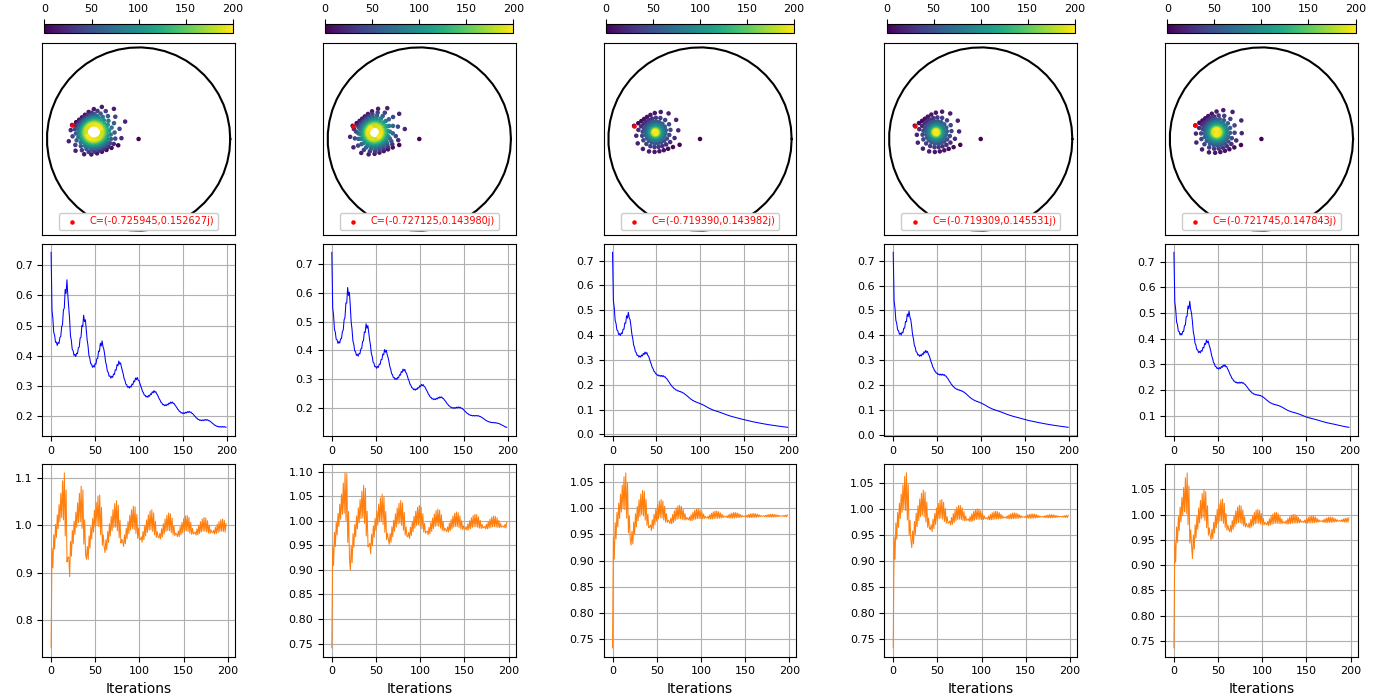

In [4]:

C_arr = [-0.72772108+0.14963497*1j,
         -0.68681531+0.29432931*1j,
         -0.08417608+0.64660606*1j]

ncols   = 5
nrows   = 3
Nplots  = [nrows,ncols]
fig, ax = plt.subplots(Nplots[0],Nplots[1],figsize=(1400*px2inch ,700*px2inch),constrained_layout=True)
fig.canvas.header_visible = False
ax      = ax.flatten()
MS      = 5
axlim   = [-1.05,1.05]


theta = np.linspace(0,2*np.pi)
xc,yc  = np.cos(theta),np.sin(theta)

N          = 201
C0         = -0.724567 + 0.146506*1j #get_C( C_lims )
estable    = N-2
no_estable = int(N/2)

for i in range(ncols):
    
    while True:

          C_dxy = 0.01
          rnd   = 2*np.random.rand(2)-1
          C     = C0 + rnd[0]*C_dxy + 1j*rnd[1]*C_dxy 
          zx,zy,iter = mandelbrot_orbits(N,C)
          distances  = distance_points(zx,zy)
          mean_dis   = np.mean(distances[-int(N/2):])
          
          if iter>no_estable  and mean_dis>0.05:
             Cx,Cy = np.real(C),np.imag(C)
             ratio = distances[1:]/distances[:-1]
             print(f'C{i}: {Cx:0.8f} {Cy:0.8f}*1j')
             break

    # Row 1
    #######    
    # Unit Circle
    ax[i].plot(xc,yc,'k')
    
    # Iterations
    points = ax[i].scatter(zx, zy, s=MS, c=np.arange(N))
    fig.colorbar(points, ax=ax[i],location='top', shrink=0.7)

    # C point
    ax[i].scatter(Cx,Cy,s=MS,c='r',label=f'C=({Cx:0.6f},{Cy:0.6f}j)')
    plot_sets(ax[i],xli=axlim,yli=axlim,ba=1,ar=1,ticks_off=1,leg={'labelcolor':'linecolor','loc':'lower center','fontsize':7,'framealpha':0.99})
    
    # Row 2
    #######  
    ax[ncols+i].plot( distances  ,'b',lw=0.75)
    plot_sets(ax[ncols+i],gr=True, ba=1)

    # Row 3
    #######  
    ax[2*ncols+i].plot( ratio  ,'tab:orange',lw=0.75)
    plot_sets(ax[2*ncols+i],gr=True, ba=1,xla='Iterations')

plt.show()



## Increase resolution in the Mandelbrot set

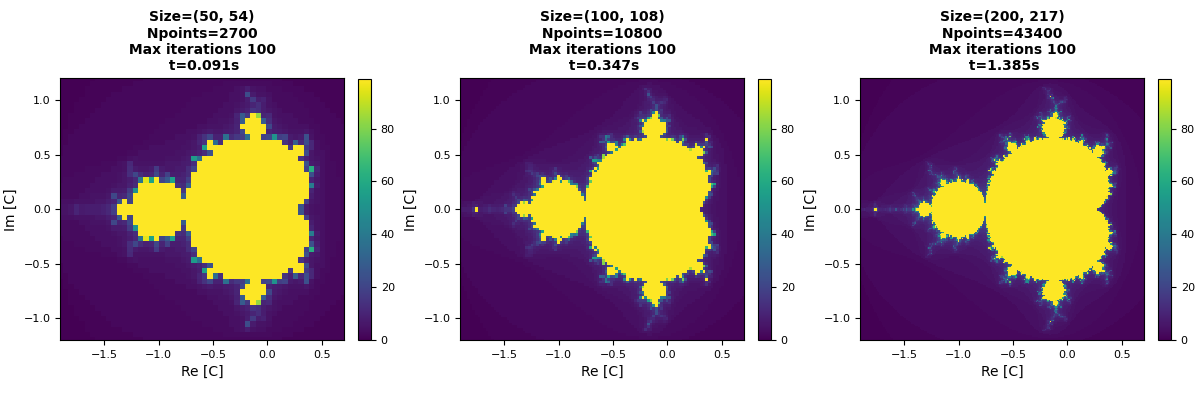

In [5]:
sizepx  = 400
fig, ax = plt.subplots(1,3,figsize=(3*sizepx*px2inch, sizepx*px2inch),constrained_layout=True)
fig.canvas.header_visible = False

Msize_arr = [50,100,200]
Nmax_arr  = [100,100,100]
for i,(N,M) in enumerate(zip(Nmax_arr,Msize_arr)):
    st = time.time()
    Re,Im,Ma = mandelbrot_set(Nmax=N,Msize=M)
    ft = time.time()-st
    pco = ax[i].pcolormesh(Re,Im, Ma)
    fig.colorbar(pco, ax=ax[i],location='right', shrink=0.7)
    xlim = [np.min(Re),np.max(Re)]
    ylim = [np.min(Im),np.max(Im)]
    plot_sets(ax[i],gr=False,xli=xlim,yli=ylim,ti=f'Size={Ma.shape}\n Npoints={Ma.shape[0]*Ma.shape[1]} \n Max iterations {N} \n t={ft:0.3f}s',xla='Re [C]',yla='Im [C]',ar=1)
plt.show()

## Linear color map vs log

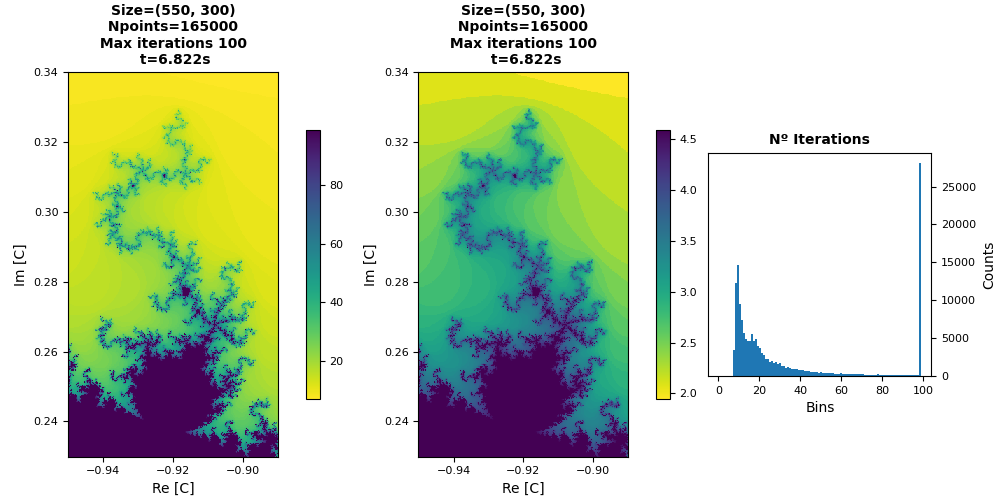

In [6]:

update = True
if update:
    lims1 = { "xlims":[-0.95,-0.89],"ylims":[0.23,0.34]}
    N     = 100
    M     = 300
    st = time.time()
    Re,Im,Ma = mandelbrot_set(Nmax=N,Msize=M,lims=lims1)
    ft = time.time()-st


sizepx  = 500
fig, ax = plt.subplots(1,3,figsize=(2*sizepx*px2inch, sizepx*px2inch),constrained_layout=True)
fig.canvas.header_visible = False

cmap   = 'viridis_r'
normal = ax[0].pcolormesh(Re,Im, Ma,         cmap=cmap)
log    = ax[1].pcolormesh(Re,Im, np.log(Ma), cmap=cmap)
ax[2].hist(Ma.flatten(), bins=N, range=(0,N-1))

fig.colorbar(normal, ax=ax[0],location='right', shrink=0.7)
fig.colorbar(log,    ax=ax[1],location='right', shrink=0.7)

plot_sets(ax[0],gr=False,ti=f'Size={Ma.shape}\n Npoints={Ma.shape[0]*Ma.shape[1]} \n Max iterations {N} \n t={ft:0.3f}s',xla='Re [C]',yla='Im [C]',ar=1)
plot_sets(ax[1],gr=False,ti=f'Size={Ma.shape}\n Npoints={Ma.shape[0]*Ma.shape[1]} \n Max iterations {N} \n t={ft:0.3f}s',xla='Re [C]',yla='Im [C]',ar=1)
plot_sets(ax[2],gr=False,ti=f'Nº Iterations',xla='Bins',yla='Counts',ba=1)
ax[2].yaxis.tick_right()
ax[2].yaxis.set_label_position("right")
plt.show()

# plt.imsave(f'imgs/img_mandelbrot{M}_nor.png',np.flipud(Ma)         )
# plt.imsave(f'imgs/img_mandelbrot{M}_log.png',np.flipud(np.log(Ma)) )

## Bifurcation diagram 

$$x_{n+1}=rx_n(1-x_n)$$

The distance between two successive µ’s <i>bifurcations</i> in which period doubling occurs has a limit. That is:

$$Feigenbaum = \lim_{k\to\infty} \frac{\mu_k-\mu_{k-1}}{\mu_{k+1}-\mu_{k}}=4.669202...$$

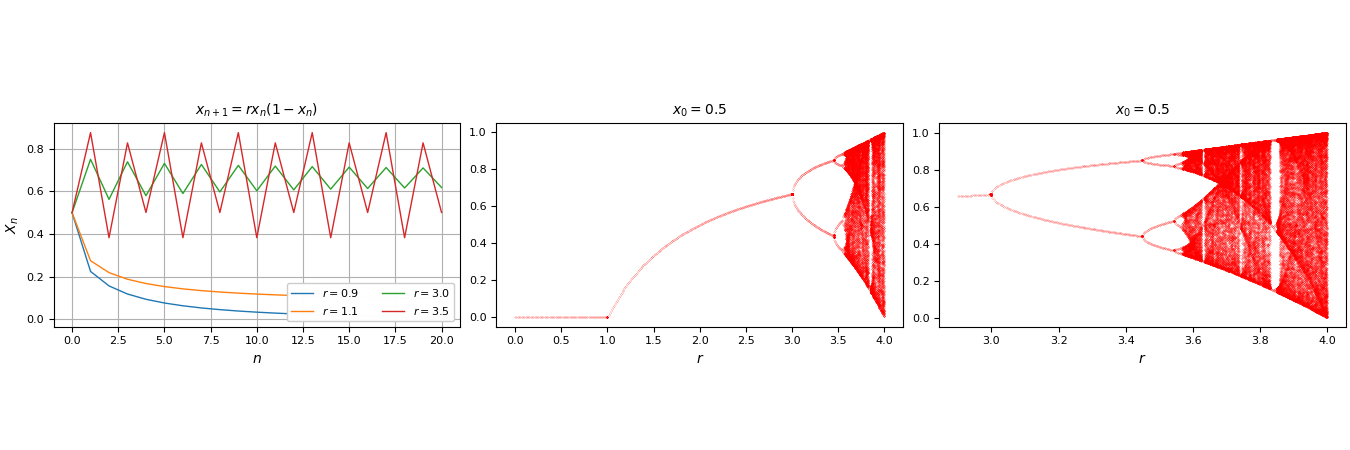

In [7]:

sizepx = 450
fig, ax = plt.subplots(1,3,figsize=(3*sizepx*px2inch, sizepx*px2inch),constrained_layout=True)
fig.canvas.toolbar_position = 'right'
fig.canvas.header_visible  = False

N = 21
for r in [0.9,1.1,3,3.5]:
    X,Xunq = logistic_map(x0=0.5,r=r,N=N)
    ax[0].plot(X,lw=1,label=f'$r={r:0.1f}$')
plot_sets(ax[0],gr=True,ti='$x_{n+1}=rx_n(1-x_n)$',xla='$n$',yla='$X_n$',ba=0.5,leg={'ncols':2})

nR = 500

R,_ = map_fun(0,4,n=3,Npoints=nR,decrease_diff=True)
for r in R:
    X,Xunq = logistic_map(x0=0.75,r=r,N=2000)
    ax[1].plot(r*np.ones_like(Xunq),Xunq,'r.',markersize=0.25)
    plot_sets(ax[1],xla='$r$',ti='$x_0=0.5$',ba=0.5)

R,_ = map_fun(2.9,4,n=3,Npoints=nR,decrease_diff=True)
for r in R:
    X,Xunq = logistic_map(x0=0.75,r=r,N=2000)
    ax[2].plot(r*np.ones_like(Xunq),Xunq,'r.',markersize=0.25)
    plot_sets(ax[2],xla='$r$',ti='$x_0=0.5$',ba=0.5)

plt.show()


## Unique values in the logistic map

In [8]:
# references:
# https://mathworld.wolfram.com/LogisticMap.html
# https://thatsmaths.com/2023/12/07/the-logistic-map-is-hiding-in-the-mandelbrot-set/

R  = [[1.0,      3       , "Cycle 1" ], 
      [3.0,      3.449490, "Cycle 2" ],  
      [3.449490, 3.544090, "Cycle 4" ],  
      [3.544090, 3.564407, "Cycle 8" ],   
      [3.564407, 3.568750, "Cycle 16"], 
      [3.568750, 3.56969,  "Cycle 32"]]

# One Test
for r in R:
    a,b        = r[0],r[1]
    rr         = a + (b-a)*np.random.rand()
    X,Xunq     = logistic_map(x0=0.5,r=rr,N=5000,Nunique=50,Ndecimals=6)
    percen     = 100*(rr-a)/(b-a)
    print(f'{r[2]:9s} unq:{Xunq.size:3d} percent[a,b]: {percen:5.2f}')

# N Test
errors = np.zeros(len(R))
test   = 100
for k in range(test ):
    for i,rlimits in enumerate(R):

        a,b    = rlimits[0],rlimits[1]
        rr     = a + (b-a)*np.random.rand()
        X,Xunq = logistic_map(x0=0.5,r=rr,N=10000,Nunique=50,Ndecimals=4)

        if abs(Xunq.size-2**i) !=0:
            errors[i] += 1

print(f'Errors')         
print(f'Ntest:{test}, [1, 2, 4, 8, 16, 32]') 
print(f'Ntest:{test}, {errors}') 

Cycle 1   unq:  1 percent[a,b]: 19.96
Cycle 2   unq:  2 percent[a,b]: 17.50
Cycle 4   unq:  4 percent[a,b]: 64.40
Cycle 8   unq:  8 percent[a,b]:  3.94
Cycle 16  unq: 16 percent[a,b]: 11.19
Cycle 32  unq: 32 percent[a,b]: 14.68
Errors
Ntest:100, [1, 2, 4, 8, 16, 32]
Ntest:100, [ 0.  0.  0.  0.  0. 13.]


## Logistic Map and the Mandelbrot Set

<table>

<tr><td>
Correspondence between the parameter space of the logistic map and that of the Mandelbrot set

$$ Z = r\left( \frac{1}{2}-x \right) $$
$$ C = \frac{r}{2} \left( 1-\frac{r}{2}\right) $$

$$Map: r[1,4] \rightarrow [0.25,-2]$$

</td><td>
<img src="https://thatsmaths.files.wordpress.com/2023/12/logistic-mandelbrot-bifurcation.png" width="100%"/>
</td></tr>

</table>

In [9]:

R  = [[1.0,      3       , "Cycle 1" ], 
      [3.0,      3.449490, "Cycle 2" ],  
      [3.449490, 3.544090, "Cycle 4" ],  
      [3.544090, 3.564407, "Cycle 8" ]]

def z_transfor(r,x): return r*(0.5-x)
def c_transfor(r):   return r*0.5*(1-r/2)

for r in R:
    
    # logistc map
    a,b        = r[0],r[1]
    r_rand     = a + (b-a)*np.random.rand()
    x,xunq     = logistic_map(x0=0.5,r=r_rand,N=5000,Nunique=50,Ndecimals=6)
    
    # Mandelbrot 
    C          = c_transfor(r_rand)
    Niter      = 5000
    zx,zy,iter = mandelbrot_orbits(Niter,C)
    zxunq      = np.unique( trunc(zx[-100:], decs=6))
    zxmap      = z_transfor(r_rand,xunq)

    print(f'{r[2]:9s}');print('zx_unq',np.sort(zxunq));print('zx_map',np.sort(zxmap));print()

Cycle 1  
zx_unq [0.338041]
zx_map [0.33804249]

Cycle 2  
zx_unq [-0.699443 -0.300556]
zx_map [-0.69944259 -0.30055613]

Cycle 4  
zx_unq [-1.263974 -1.164745  0.08537   0.326368]
zx_map [-1.26397412 -1.16474421  0.08537316  0.3263705 ]

Cycle 8  
zx_unq [-1.382877 -1.354929 -1.177741 -1.102572 -0.167229  0.00418   0.452938
  0.529455]
zx_map [-1.382874   -1.35492623 -1.17773881 -1.10257141 -0.16722792  0.0041815
  0.45293872  0.52945729]



## Mandelbrot Set 3D Real-Imag Part

<img src="https://upload.wikimedia.org/wikipedia/commons/0/0e/Mandelbrot_Set_%E2%80%93_Periodicities_coloured.png" width="30%"/>

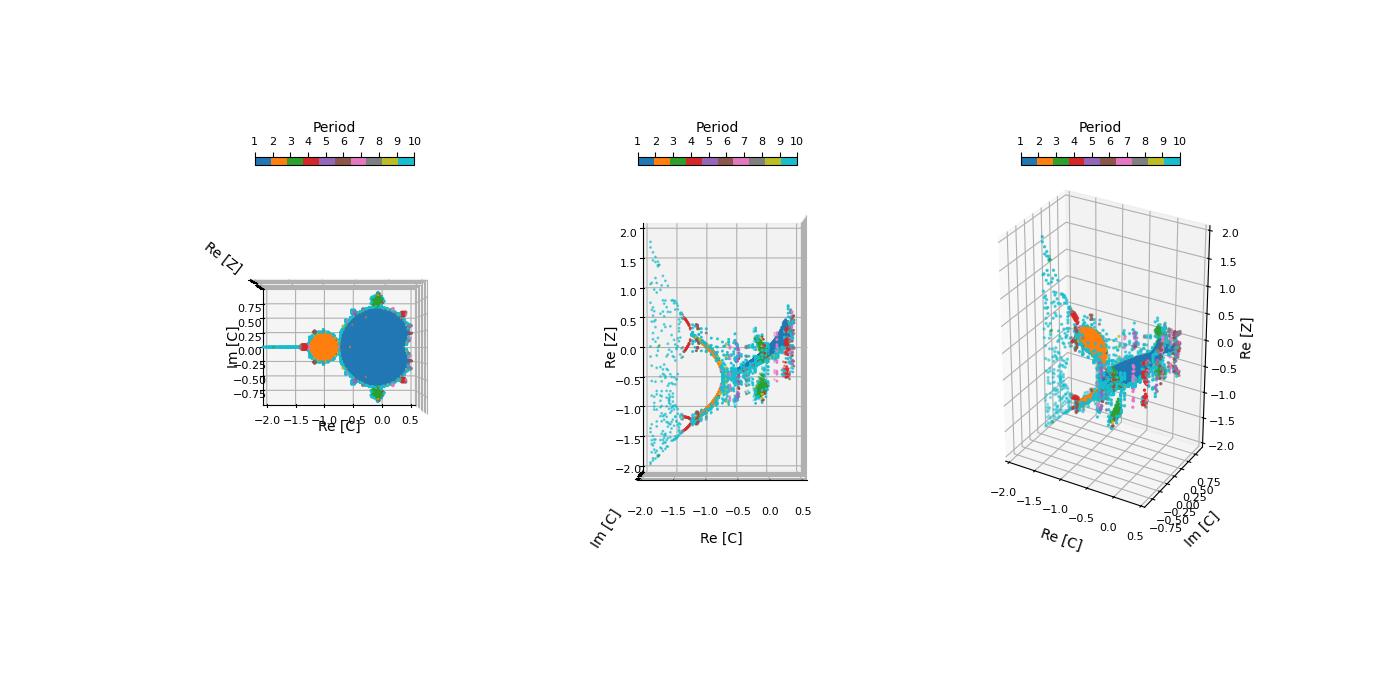

In [10]:
Cre,Cim,Zre,periods= mandelbrot_set3D(Nmax=500,Msize=101,lims={ "xlims":[-1.9,0.5],"ylims":[-1,1]})

sizepx  = 700
fig, ax = plt.subplots(1,3,figsize=(2*sizepx*px2inch, sizepx*px2inch),constrained_layout=False,subplot_kw={"projection": "3d"})
fig.canvas.header_visible = False
cmap       = 'tab10'

points_3d1 = ax[0].scatter(Cre,Cim,Zre, c=periods, s=1, cmap=cmap)
cbar       = fig.colorbar(points_3d1, ax=ax[0],location='top', shrink=0.5,ticks=np.arange(0,11))
cbar.set_label('Period', rotation=0)
plot_sets(ax[0],gr=True,xla='Re [C]',yla='Im [C]',zla='Re [Z]',zticks_off=True,zli=[-2,2],view=dict(elev=90, azim=-90),ar='equal')

points_3d2 = ax[1].scatter(Cre,Cim,Zre, c=periods, s=1, cmap=cmap)
cbar       = fig.colorbar(points_3d2, ax=ax[1],location='top', shrink=0.5,ticks=np.arange(0,11))
cbar.set_label('Period', rotation=0)
plot_sets(ax[1],gr=True,xla='Re [C]',yla='Im [C]',zla='Re [Z]',yticks_off=True,zli=[-2,2],view=dict(elev=0, azim=-90),ar='equal')

points_3d3 = ax[2].scatter(Cre,Cim,Zre, c=periods, s=2,cmap=cmap)
cbar       = fig.colorbar(points_3d3, ax=ax[2],location='top', shrink=0.5,ticks=np.arange(0,11))
cbar.set_label('Period', rotation=0)
plot_sets(ax[2],gr=True,xla='Re [C]',yla='Im [C]',zla='Re [Z]',zli=[-2,2],ar='equal')

plt.show()


## Mandelbrot Set 3D Real Part

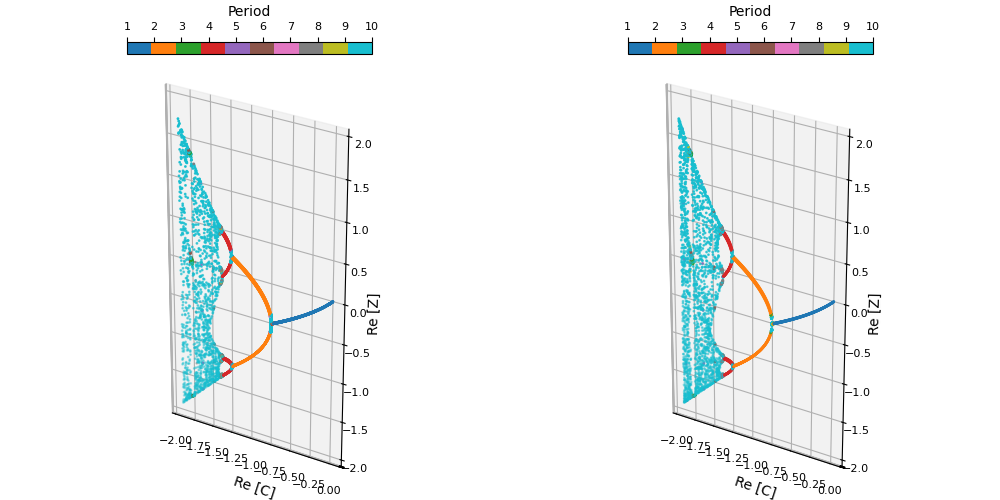

In [11]:

sizepx  = 500
fig, ax = plt.subplots(1,2,figsize=(2*sizepx*px2inch, sizepx*px2inch),constrained_layout=True,subplot_kw={"projection": "3d"})
fig.canvas.header_visible = False
cmap       = 'tab10'
limsxy     = {"xlims":[-1.9,0],"ylims":[-0.01,0.01]}

Cre,Cim,Zre,periods = mandelbrot_set3D(Nmax=500,Msize=7,lims=limsxy)
points_3d4 = ax[0].scatter(Cre,Cim,Zre, c=periods, s=1, cmap=cmap)
cbar       = fig.colorbar(points_3d4, ax=ax[0],location='top', shrink=0.5,ticks=np.arange(0,11))
cbar.set_label('Period', rotation=0)
plot_sets(ax[0],gr=True,xla='Re [C]',zla='Re [Z]',xli=[-2,0.1],zli=[-2,2],ar='equal',yticks_off=True)


Cre,Cim,Zre,periods = mandelbrot_set3D(Nmax=500,Msize=5,xscaled=10,lims=limsxy)
points_3d5 = ax[1].scatter(Cre,Cim,Zre, c=periods, s=1, cmap=cmap)
cbar       = fig.colorbar(points_3d5, ax=ax[1],location='top', shrink=0.5,ticks=np.arange(0,11))
cbar.set_label('Period', rotation=0)
plot_sets(ax[1],gr=True,xla='Re [C]',zla='Re [Z]',xli=[-2,0.1],zli=[-2,2],ar='equal',yticks_off=True)

plt.show()